### Name: Bhargavi Poyekar
### BE COMPS
### B Batch
### UID: 2018130040

In [ ]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
from prettytable import PrettyTable
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, roc_curve, roc_auc_score, auc, r2_score

warnings.filterwarnings('ignore')
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In [ ]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

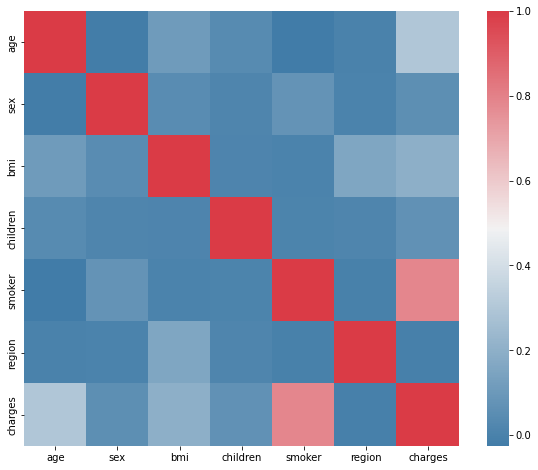

In [ ]:
f, ax = pl.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

In [ ]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
import scipy.special
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file

p = figure(title="Distribution of charges",tools="save",
            background_fill_color="#E8DDCB")
hist, edges = np.histogram(data.charges)
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
p.xaxis.axis_label = 'x'
p.yaxis.axis_label = 'Pr(x)'
# show(gridplot(p,ncols = 2, plot_width=400, plot_height=400, toolbar_location=None))

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

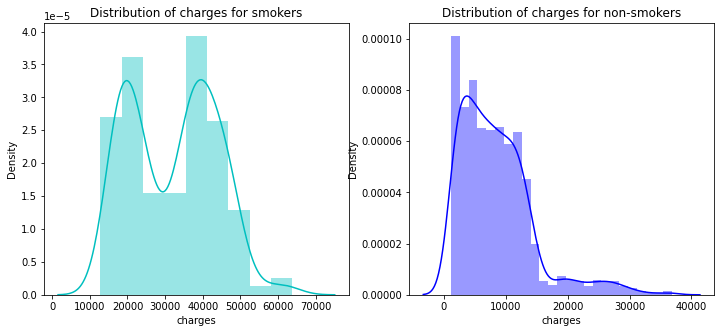

In [ ]:
f= pl.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

### Smoking patients spend more on treatment. 

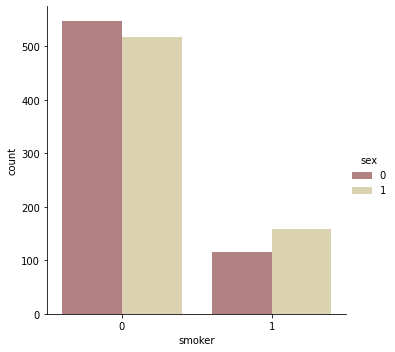

In [ ]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=data)


### Women are coded with the symbol " 1 "and men - "0". Thus non-smoking people and the truth more. Also we can notice that more male smokers than women smokers. It can be assumed that the total cost of treatment in men will be more than in women, given the impact of smoking. 

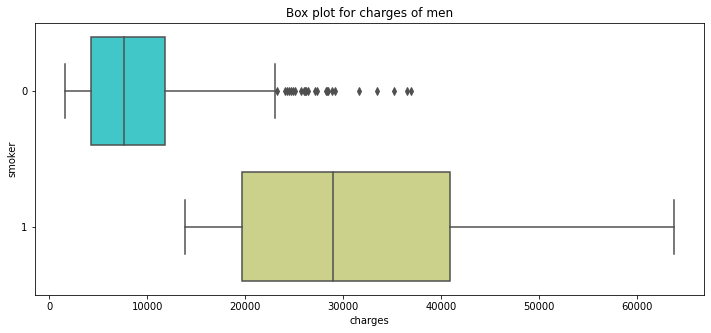

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 0)] , orient="h", palette = 'rainbow')

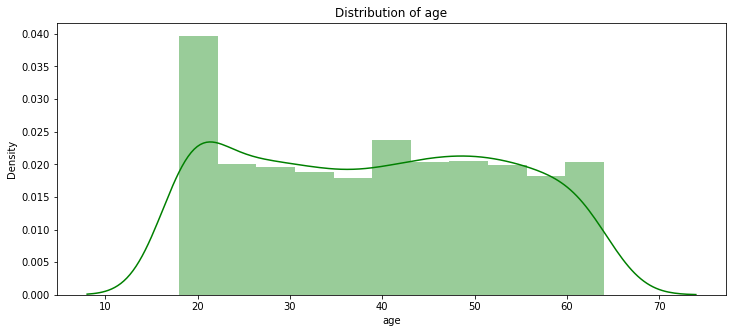

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'g')

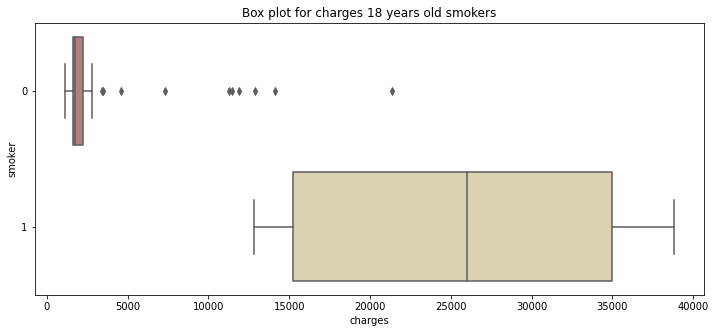

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = data[(data.age == 18)] , orient="h", palette = 'pink')

Text(0.5, 1.0, 'Smokers and non-smokers')

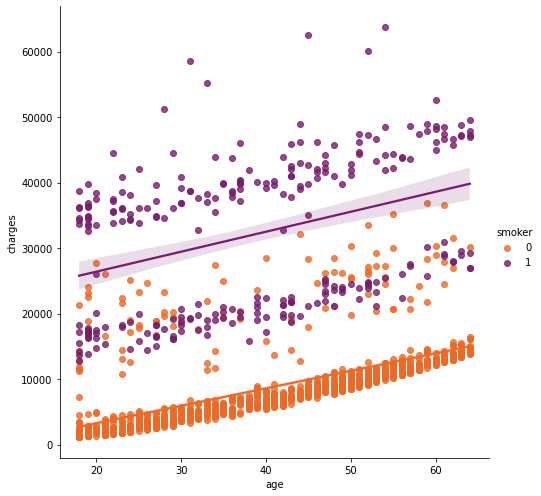

In [ ]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'inferno_r', size = 7)
ax.set_title('Smokers and non-smokers')

In non-smokers, the cost of treatment increases with age. 

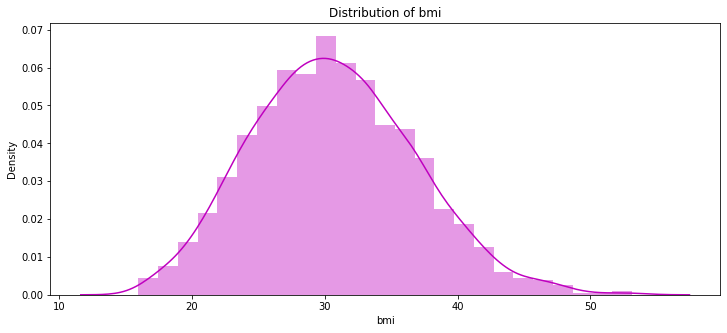

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'm')

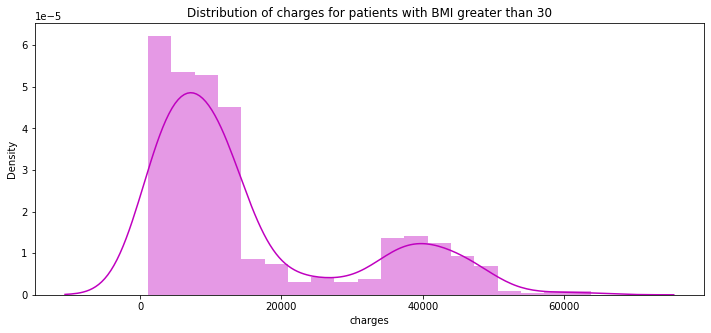

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'm')

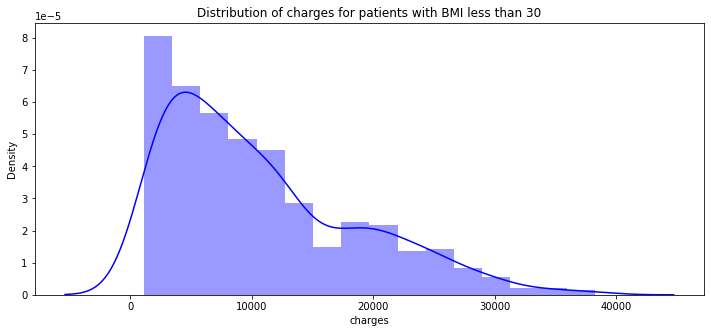

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'b')

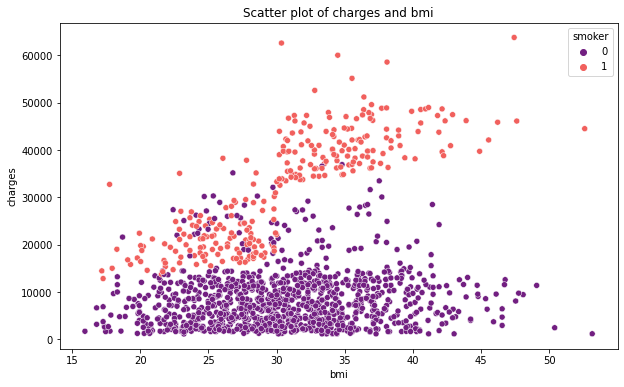

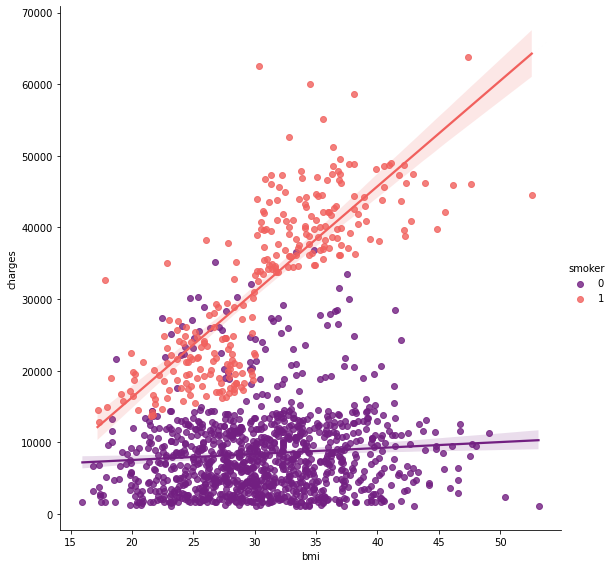

In [ ]:
pl.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=data,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, palette = 'magma', size = 8)

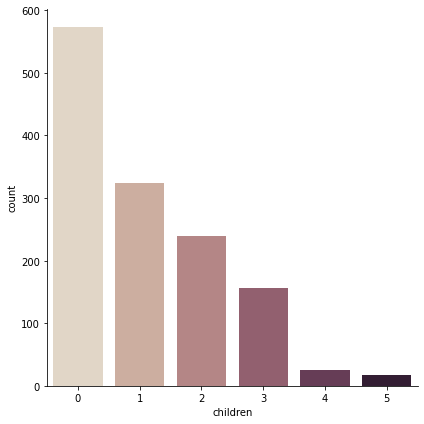

In [ ]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=data, size = 6)

Text(0.5, 1.0, 'Smokers and non-smokers who have childrens')

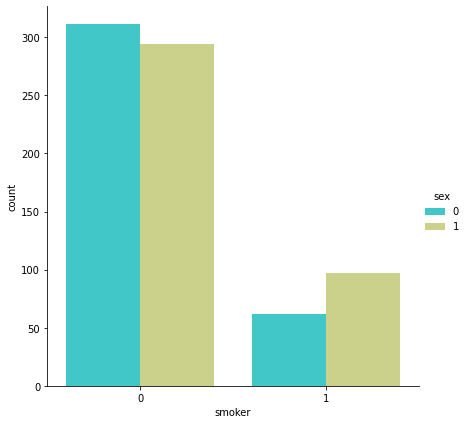

In [ ]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex",
            data=data[(data.children > 0)], size = 6)
ax.set_title('Smokers and non-smokers who have childrens')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [ ]:
x = data.drop(['charges'], axis = 1)
y = data.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7962732059725786


In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


## Apply PCA

In [ ]:
X = data.drop('charges', axis=1)
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [ ]:
X = np.array(X)

## Normalization using StandardScaler

In [ ]:
X = StandardScaler().fit_transform(X)

### Covariance Matrix

In [ ]:
cov_mat = np.cov(X , rowvar = False)

In [ ]:
insurance_columns = list(data.drop('charges', axis=1).columns)
cov_table = PrettyTable([' '] + insurance_columns)
for i in range(len(insurance_columns)):
    cov_table.add_row([insurance_columns[i]] + list(cov_mat[i]))
print(cov_table)

+----------+-----------------------+-----------------------+-----------------------+----------------------+------------------------+------------------------+
|          |          age          |          sex          |          bmi          |       children       |         smoker         |         region         |
+----------+-----------------------+-----------------------+-----------------------+----------------------+------------------------+------------------------+
|   age    |   1.0007479431563202  |  -0.02087147118973159 |  0.10935361070451761  | 0.042500762955677326 | -0.025037464140276314  | 0.0021289042166453454  |
|   sex    |  -0.02087147118973159 |   1.0007479431563222  |  0.04640583363107108  | 0.01717581468050659  |  0.07624179883352682   | 0.0045918173366583225  |
|   bmi    |  0.10935361070451761  |  0.04640583363107108  |   1.0007479431563202  | 0.012768443753224794 | 0.0037532310103692693  |  0.15768369883893432   |
| children |  0.042500762955677326 |  0.017175814680

## Apply PCA

### Eigen Values and Eigen Vectors

In [ ]:
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

In [ ]:
eigen_vectors

array([[ 4.14861464e-01,  9.57719586e-02,  5.62929527e-01,
         4.84880595e-01,  3.31382274e-01, -3.96111907e-01],
       [ 2.00536263e-01, -6.77767805e-01,  1.57014717e-01,
         1.08676800e-01, -6.63744948e-01, -1.52952233e-01],
       [-6.93075218e-01, -3.63916124e-02,  1.51944787e-01,
        -1.39563164e-01, -1.99346420e-04, -6.89751591e-01],
       [-1.05805500e-01,  4.33630385e-03, -6.56974251e-01,
         7.22533876e-01, -3.09145746e-02, -1.84825089e-01],
       [-1.49886549e-03,  7.15798829e-01,  1.63373154e-01,
         1.09685902e-01, -6.69635742e-01, -2.22705828e-02],
       [ 5.44173561e-01,  1.33219435e-01, -4.20789205e-01,
        -4.46672235e-01, -1.61448339e-02, -5.56136153e-01]])

In [ ]:
eigen_values

array([0.80001453, 0.92465654, 0.9659841 , 1.02030138, 1.08901232,
       1.20451879])

Each column in the Eigen vector-matrix corresponds to a principal component

### Sorted Eigen Values and Eigen Vectors

In [ ]:
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

In [ ]:
sorted_eigenvalue

array([1.20451879, 1.08901232, 1.02030138, 0.9659841 , 0.92465654,
       0.80001453])

In [ ]:
sorted_eigenvectors

array([[-3.96111907e-01,  3.31382274e-01,  4.84880595e-01,
         5.62929527e-01,  9.57719586e-02,  4.14861464e-01],
       [-1.52952233e-01, -6.63744948e-01,  1.08676800e-01,
         1.57014717e-01, -6.77767805e-01,  2.00536263e-01],
       [-6.89751591e-01, -1.99346420e-04, -1.39563164e-01,
         1.51944787e-01, -3.63916124e-02, -6.93075218e-01],
       [-1.84825089e-01, -3.09145746e-02,  7.22533876e-01,
        -6.56974251e-01,  4.33630385e-03, -1.05805500e-01],
       [-2.22705828e-02, -6.69635742e-01,  1.09685902e-01,
         1.63373154e-01,  7.15798829e-01, -1.49886549e-03],
       [-5.56136153e-01, -1.61448339e-02, -4.46672235e-01,
        -4.20789205e-01,  1.33219435e-01,  5.44173561e-01]])

### Selecting a subset from the rearranged Eigenvalue matrix

In [ ]:
num_components = 5

#Step-5
eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    
#Step-6
X_reduced = np.dot(eigenvector_subset.transpose() , X.transpose() ).transpose()

In [ ]:
eigenvector_subset

array([[-3.96111907e-01,  3.31382274e-01,  4.84880595e-01,
         5.62929527e-01,  9.57719586e-02],
       [-1.52952233e-01, -6.63744948e-01,  1.08676800e-01,
         1.57014717e-01, -6.77767805e-01],
       [-6.89751591e-01, -1.99346420e-04, -1.39563164e-01,
         1.51944787e-01, -3.63916124e-02],
       [-1.84825089e-01, -3.09145746e-02,  7.22533876e-01,
        -6.56974251e-01,  4.33630385e-03],
       [-2.22705828e-02, -6.69635742e-01,  1.09685902e-01,
         1.63373154e-01,  7.15798829e-01],
       [-5.56136153e-01, -1.61448339e-02, -4.46672235e-01,
        -4.20789205e-01,  1.33219435e-01]])

In [ ]:
principal_data =  pd.DataFrame(X_reduced, columns=['PC1', 'PC2','PC3','PC4','PC5'])
principal_data = pd.concat([principal_data, data['charges']], axis=1)
principal_data

,PC1,PC2,PC3,PC4,PC5,charges
0,0.413805,-1.119147,-1.784825,-0.684093,2.149239,16884.92400
1,-0.122760,-0.822142,-1.004169,-0.832861,-1.139038,1725.55230
2,-0.624424,-0.637478,0.557885,-1.541617,-1.059054,4449.46200
3,1.363097,-0.427586,-0.428150,0.418729,-1.094912,21984.47061
4,0.692600,-0.451383,-0.604048,0.532564,-1.138595,3866.85520
...,...,...,...,...,...,...
1333,-0.511678,-0.103708,1.768313,-0.329442,-1.017533,10600.54830
1334,1.552928,0.560371,-0.969928,0.114141,-0.017219,2205.98080
1335,-0.011964,0.530974,-1.891642,-0.524949,0.194586,1629.83350
1336,0.650201,0.587502,-1.939506,-1.061121,0.401628,2007.94500


In [ ]:
# pl.figure(figsize = (8,8))
# sns.scatterplot(data = principal_data , x = 'PC1',y = 'PC2' , hue = 'charges' , s = 60 , palette= 'icefire')
# pl.show()

###  Build the model, summarize it and evaluate the model and Summarize

In [ ]:
x = principal_data.drop(['charges'], axis = 1)
y = principal_data.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7959658113551172


In [ ]:
# Independent attributes
X = principal_data.drop(columns='charges')

# Dependent attributes
Y = principal_data[['charges']]

# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=65)

In [ ]:
# Create linear regression object
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
linear_regression_model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [ ]:
y_pred = linear_regression_model.predict(X_test)

In [ ]:
for idx, col_name in enumerate(principal_data.drop(columns='charges').columns):
    print(f"Coefficient for {col_name}: {linear_regression_model.coef_[0][idx]}")

Coefficient for PC1: -2756.409719723473
Coefficient for PC2: -5306.08708361896


In [ ]:
linear_regression_score = linear_regression_model.score(X_test, y_test)
print("Score of Linear Regression Model: ", round(linear_regression_score, 5))

Score of Linear Regression Model:  0.26164


In [ ]:
print("Mean Squared Error (MSE): ", round(mean_squared_error(y_test, y_pred), 5))

Mean Squared Error (MSE):  111670255.19807
